# **MLP model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation
from src import tensorflow

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-12 22:22:35.334543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 22:22:35.893171: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-12 22:22:35.893215: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-12 22:22:35.893220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

2023-03-12 21:59:14.382530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 21:59:14.382718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-03-12 21:59:14.392302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2023-03-12 21:59:14.392343: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu f

Model save_path: ../../../models/MLP/2023-03-12_21-59-14
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 12). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-1/assets


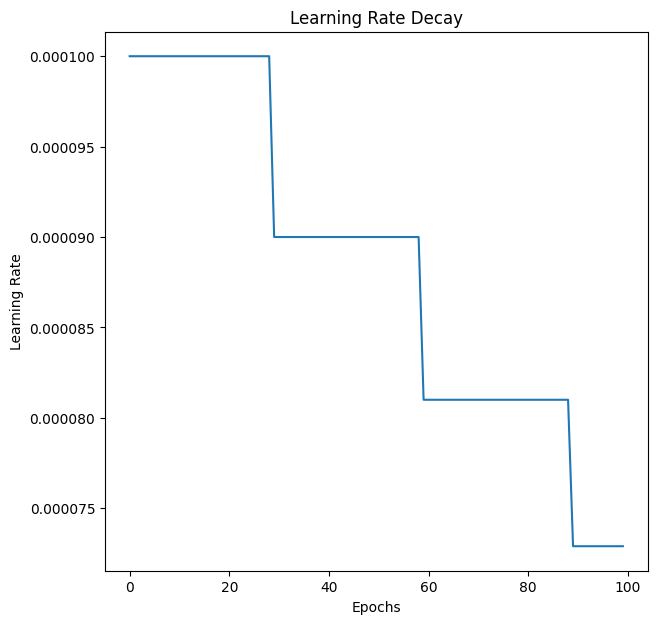

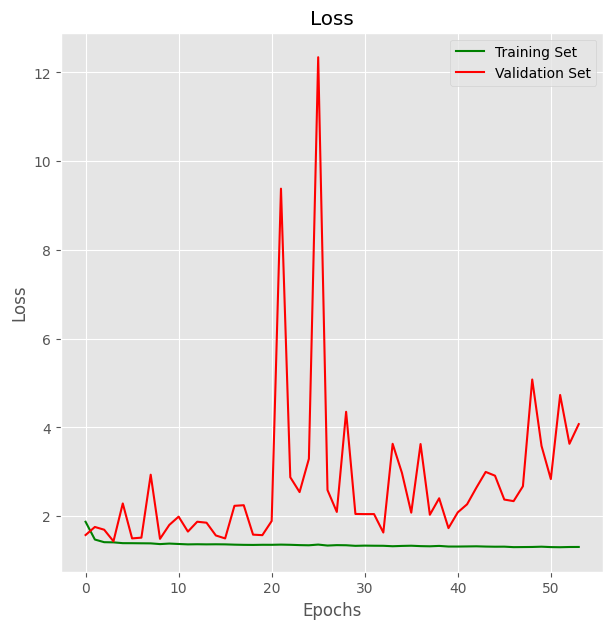

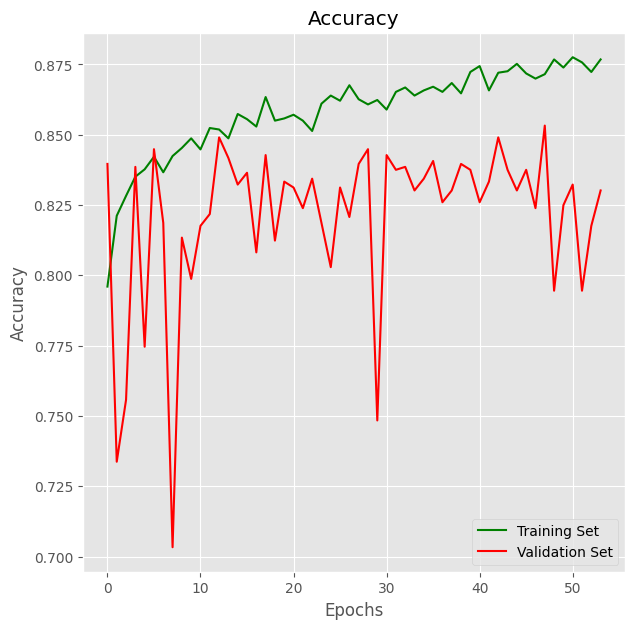

Average loss on train set: 1.3570627062409013
Average accuracy on train set: 0.8585134689454679
Average loss on test set: 2.740135660877934
Average accuracy on test set: 0.8213952956376253


2023-03-12 22:00:28.079702: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_21-59-14/fold-1: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_21-59-14/fold-1; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
1it [01:14, 74.49s/it]


-------- TERMINATED FOLD: 1 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-2/assets


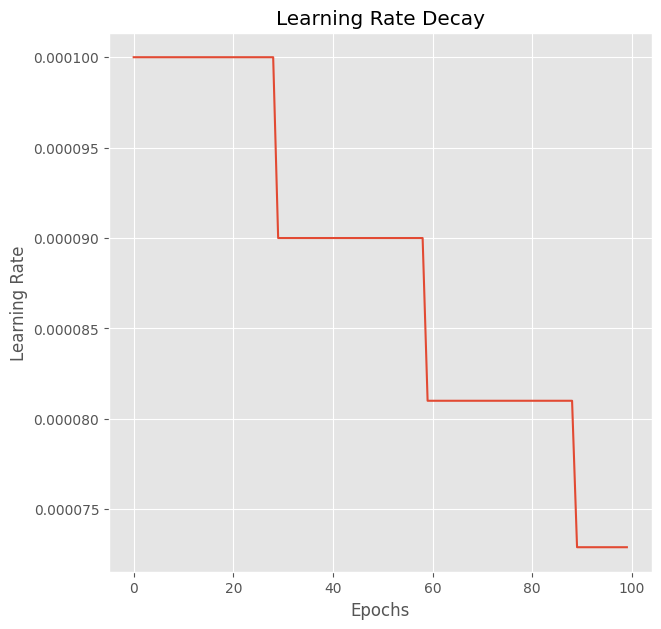

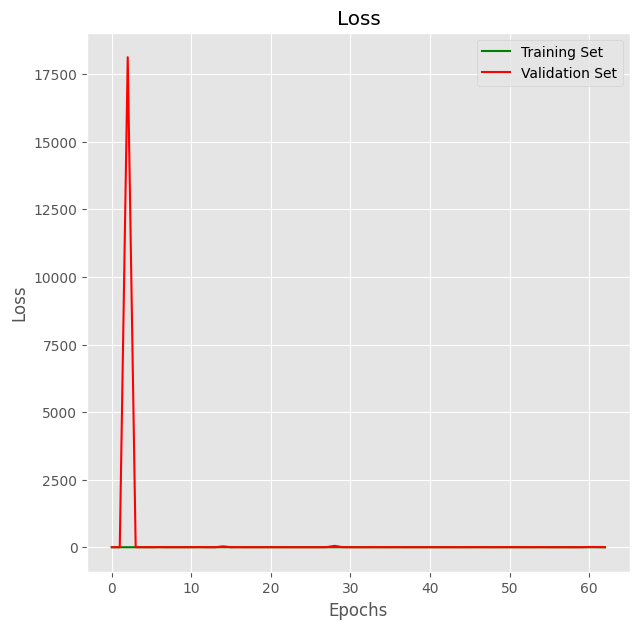

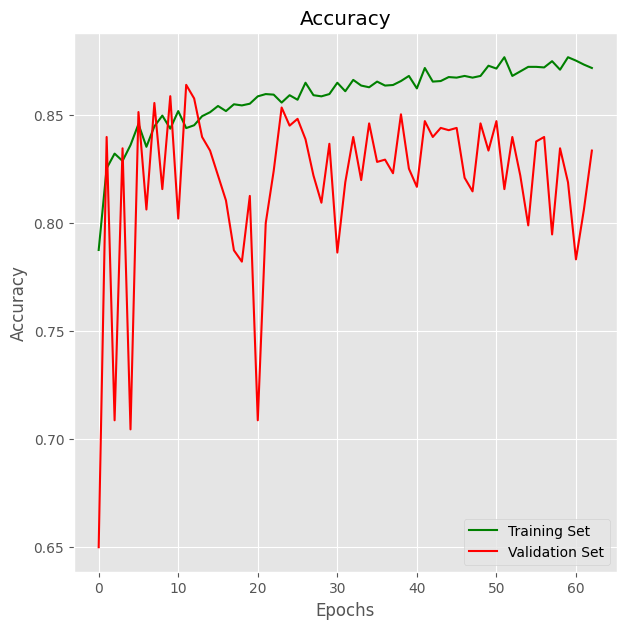

Average loss on train set: 1.3572264815133714
Average accuracy on train set: 0.8585287285229516
Average loss on test set: 291.90715742300426
Average accuracy on test set: 0.8190575980004811


2023-03-12 22:02:01.014719: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_21-59-14/fold-2: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_21-59-14/fold-2; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
2it [02:47, 85.38s/it]


-------- TERMINATED FOLD: 2 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-3/assets


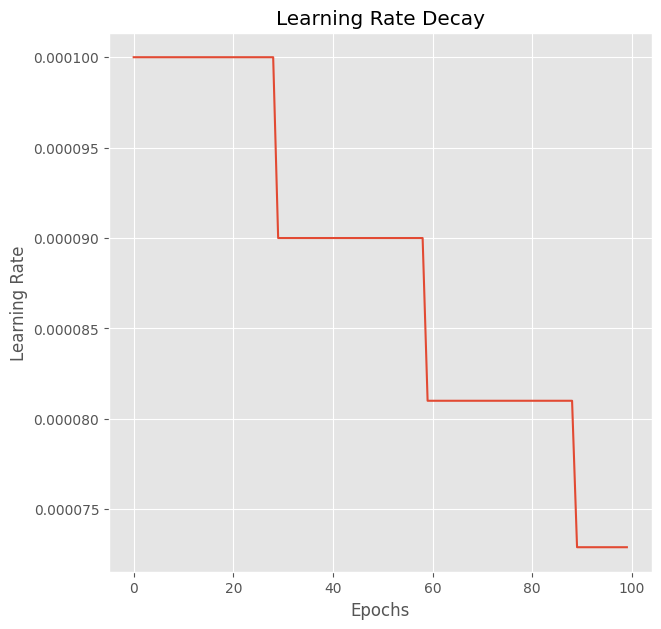

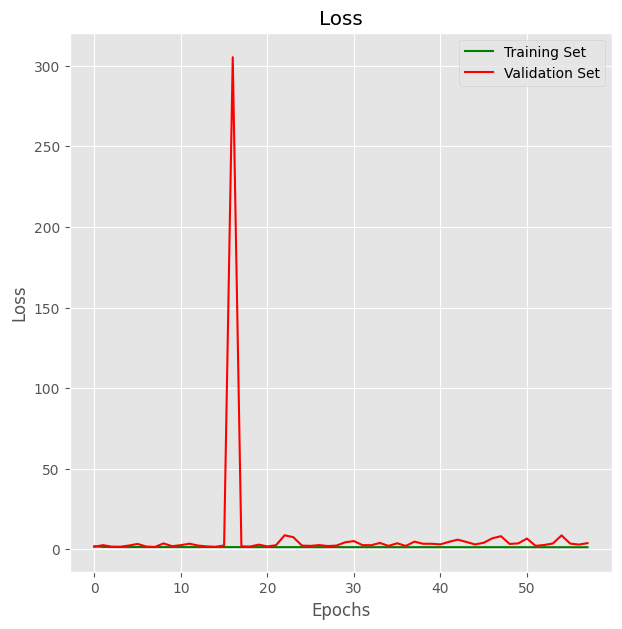

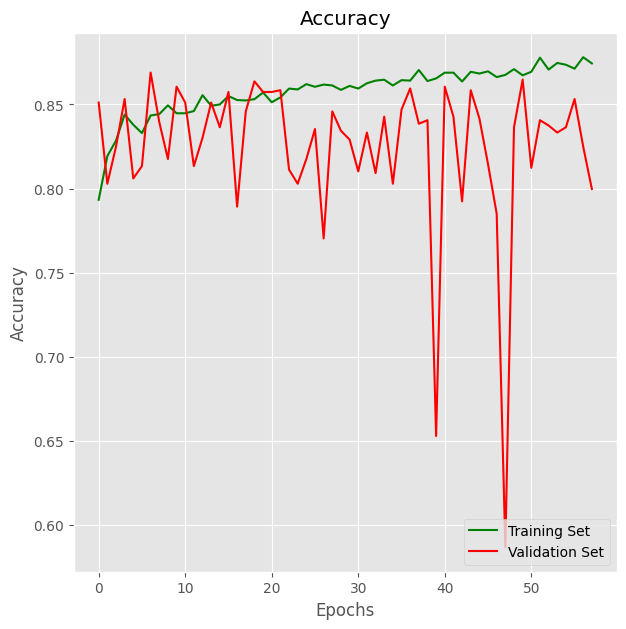

Average loss on train set: 1.3492744770543328
Average accuracy on train set: 0.8578558112012928
Average loss on test set: 8.59855155492651
Average accuracy on test set: 0.8251283179069387


2023-03-12 22:03:19.801879: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_21-59-14/fold-3: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_21-59-14/fold-3; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
3it [04:06, 82.37s/it]


-------- TERMINATED FOLD: 3 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-4/assets


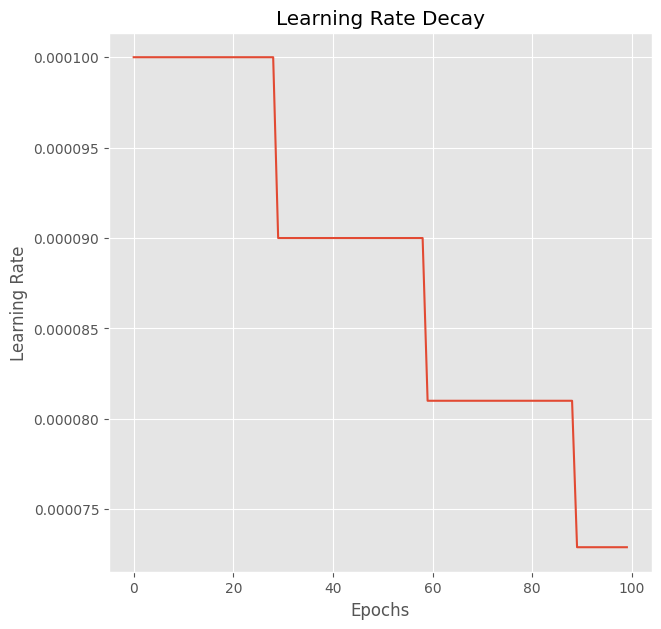

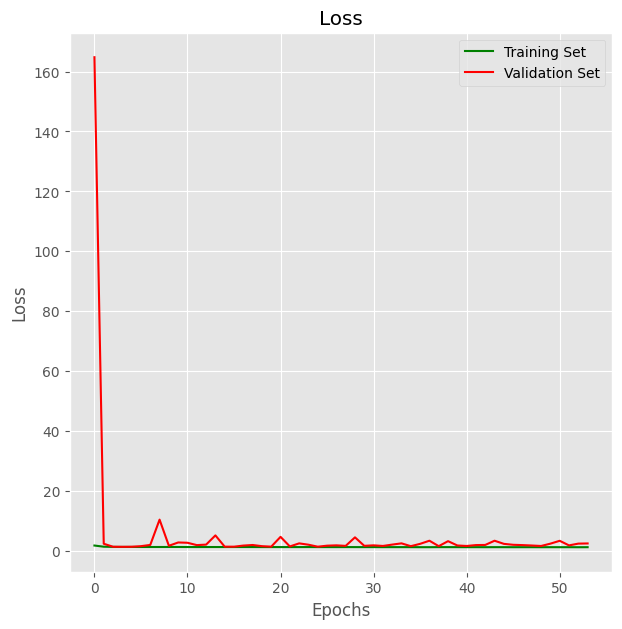

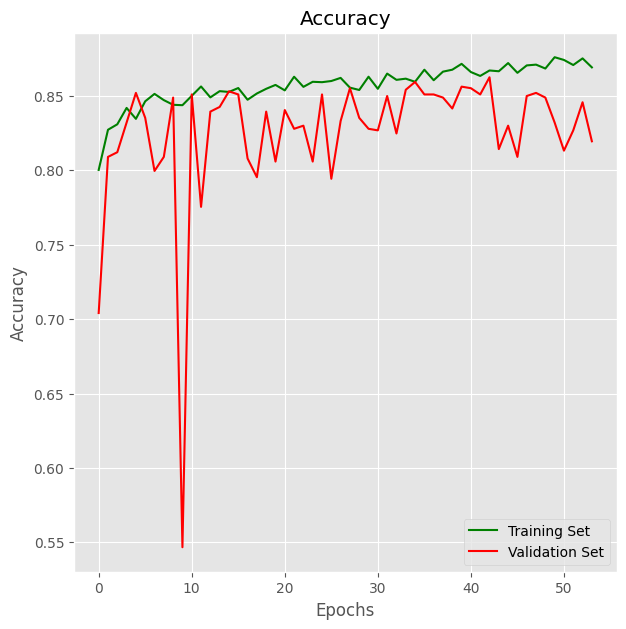

Average loss on train set: 1.3563178358254608
Average accuracy on train set: 0.8572836264416024
Average loss on test set: 5.412234884721261
Average accuracy on test set: 0.8256577672781767


2023-03-12 22:04:41.543062: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_21-59-14/fold-4: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_21-59-14/fold-4; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
4it [05:28, 82.13s/it]


-------- TERMINATED FOLD: 4 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_21-59-14/fold-5/assets


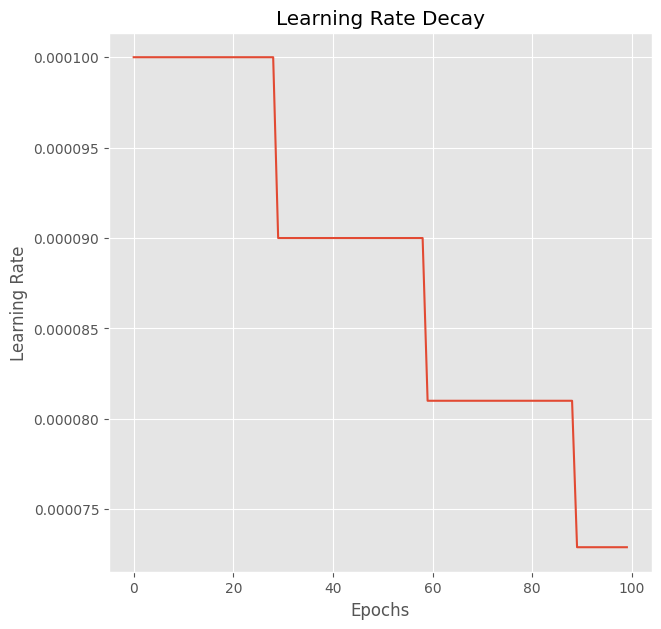

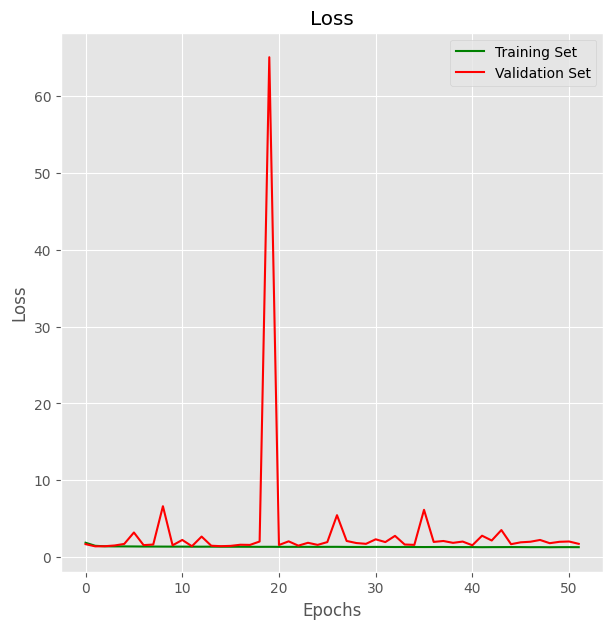

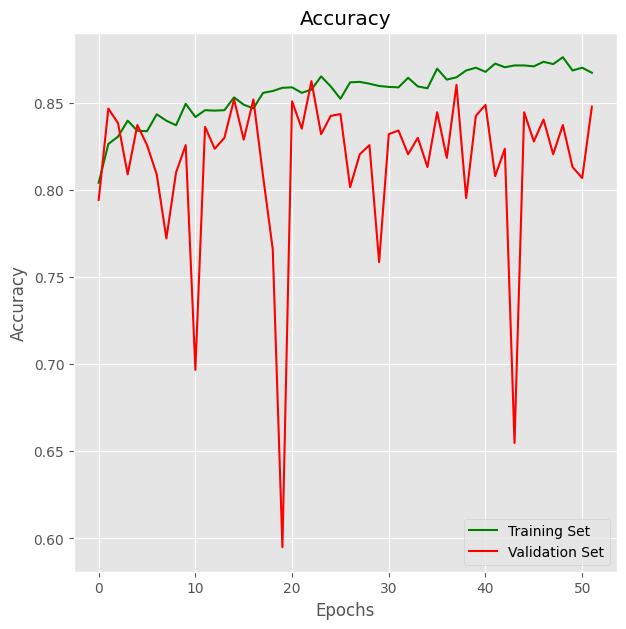

Average loss on train set: 1.3607446459623485
Average accuracy on train set: 0.8562455853590598
Average loss on test set: 3.37338095674148
Average accuracy on test set: 0.8153402232206785


2023-03-12 22:05:53.329726: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_21-59-14/fold-5: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_21-59-14/fold-5; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
5it [06:39, 79.97s/it]


-------- TERMINATED FOLD: 5 --------


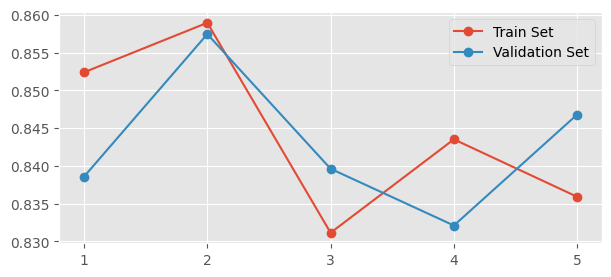

Average Train Set Accuracy: 0.8443796841463573
Average Validation Set Accuracy: 0.8429096244673667


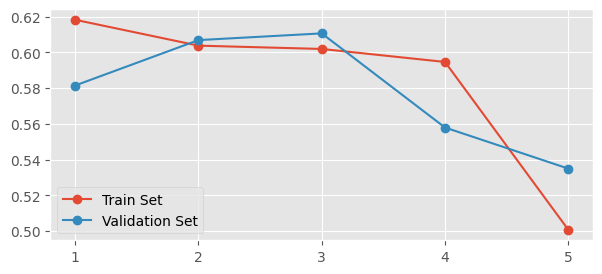

Average Train Set F1 Score: 0.5839228256137131
Average Validation Set F1 Score: 0.5784376150147368


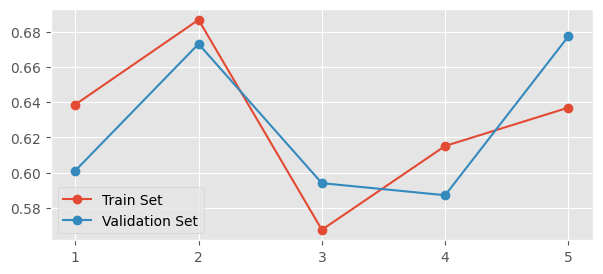

Average Train Set Precision: 0.6290214147977622
Average Validation Set Precision: 0.6265777163374853


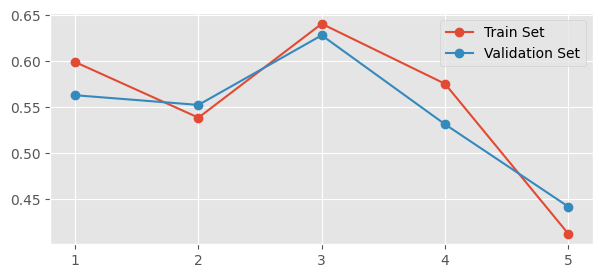

Average Train Set Recall: 0.5533878553150287
Average Validation Set Recall: 0.5435491871038853


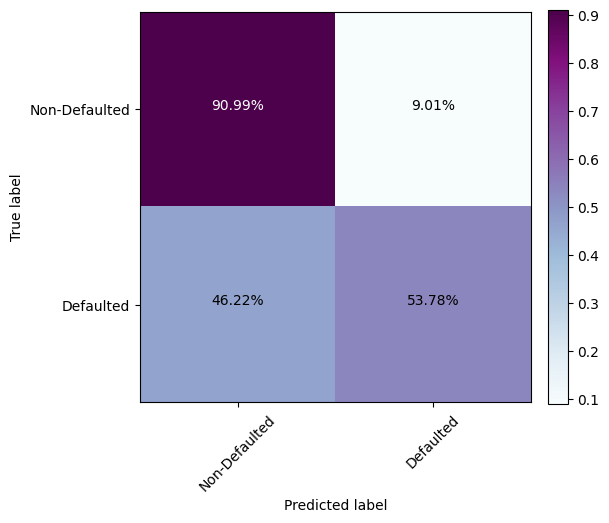

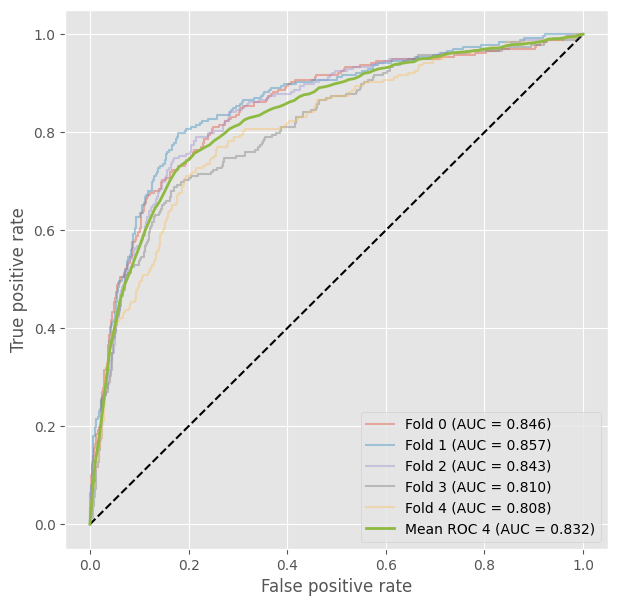

Gini derived from mean AUC 0.6647822765469822


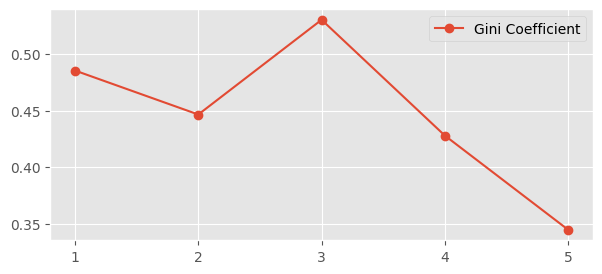

Average Gini Coefficient: 0.4470183041770167


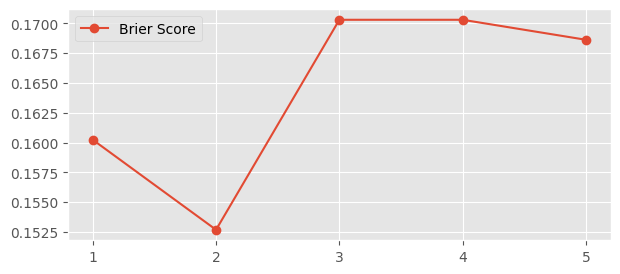

Average Brier Score: 0.16442953020134227


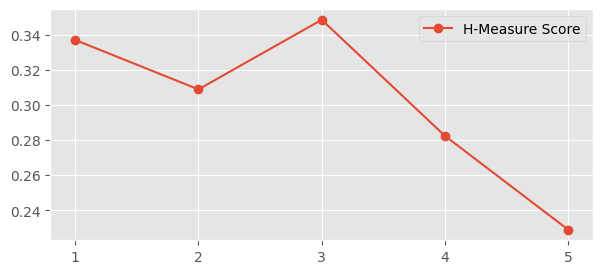

Average H-Measure Score: 0.30123973025895184


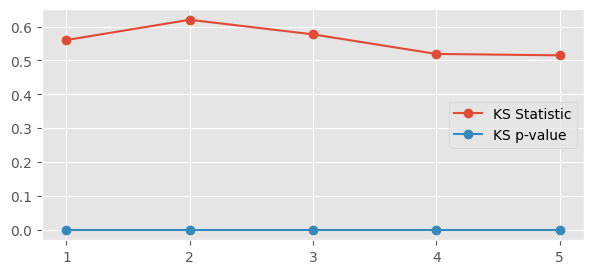

Average Kolmogorov-Smirnov Statistic: 0.5583883868012613
Average Kolmogorov-Smirnov p-value: 1.6331354471112519e-47


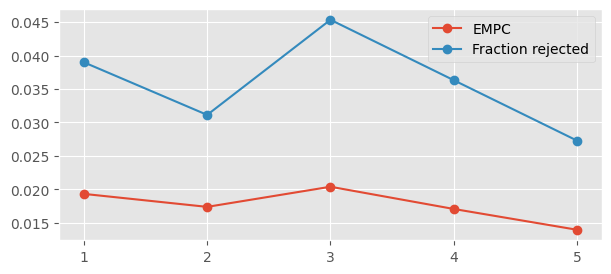

Average EMP: 0.017616892594928154
Average EMP Fractions: 0.03581567271744516


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

model = tensorflow.point_net_model()

evaluation.k_fold_cross_validate(model=model, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.0001,
                                 epochs=100, batch_size=32, verbose=False)

Model save_path: ../../../models/MLP/2023-03-12_22-25-37
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 12). These functions will not be directly callable after loading.


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-1/assets


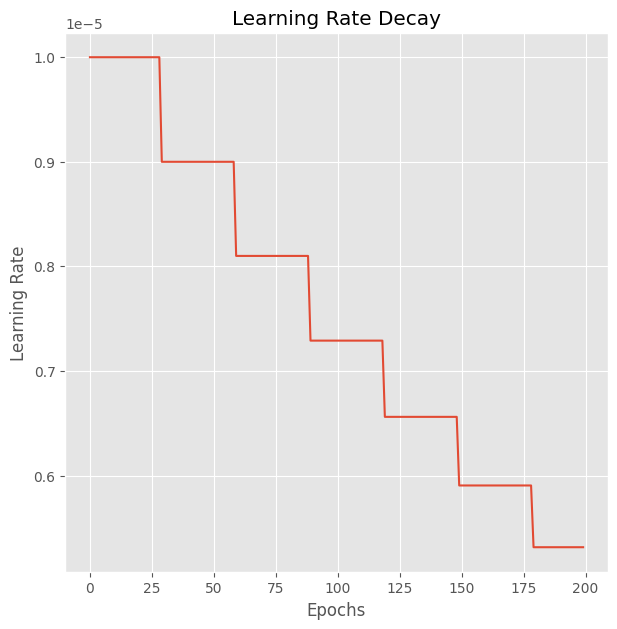

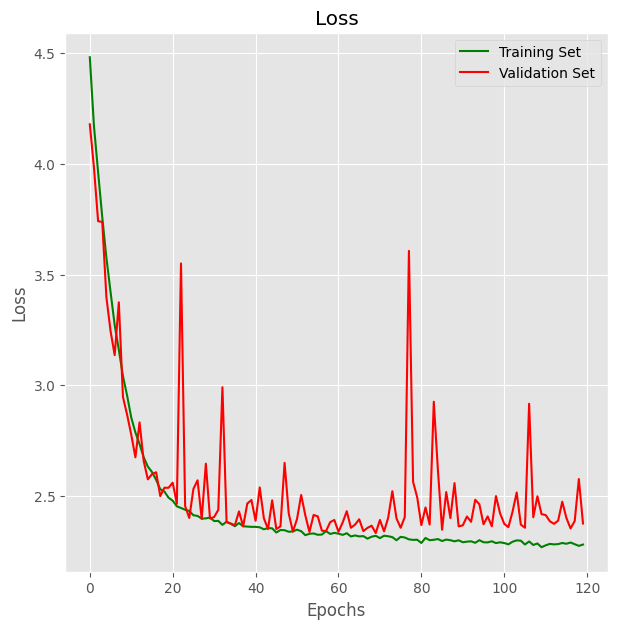

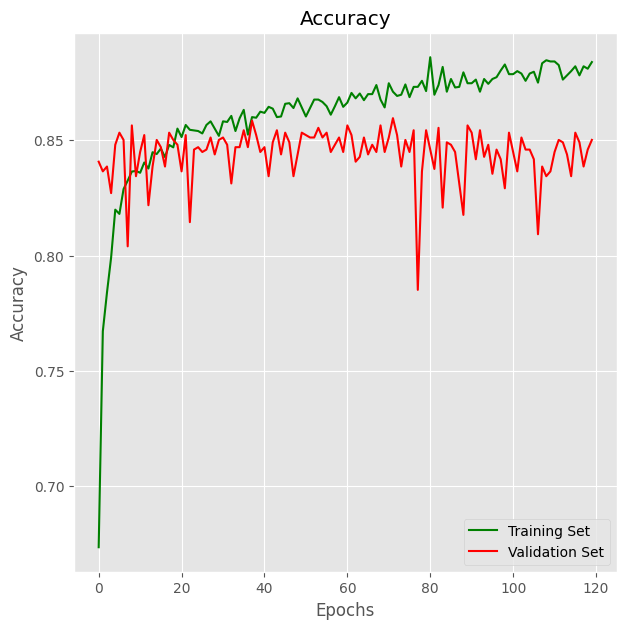

Average loss on train set: 2.4563596645991006
Average accuracy on train set: 0.8616653546690941
Average loss on test set: 2.5552354832490285
Average accuracy on test set: 0.8442959452668826


2023-03-12 22:29:58.526739: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_22-25-37/fold-1: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_22-25-37/fold-1; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
1it [04:22, 262.55s/it]


-------- TERMINATED FOLD: 1 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-2/assets


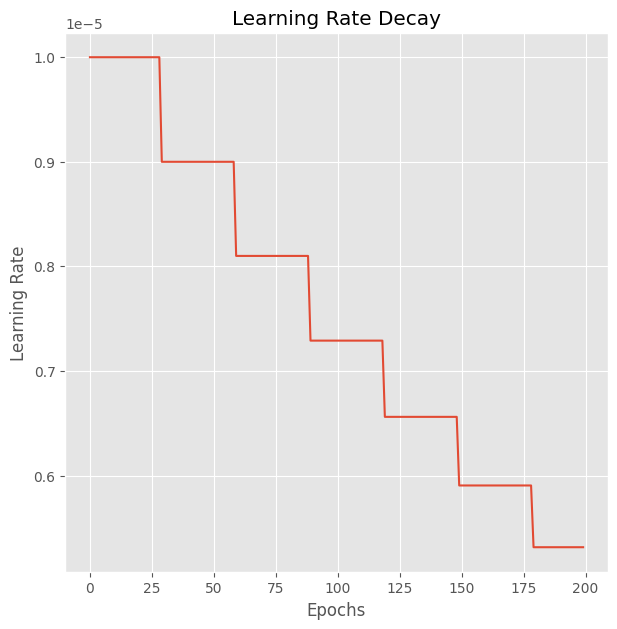

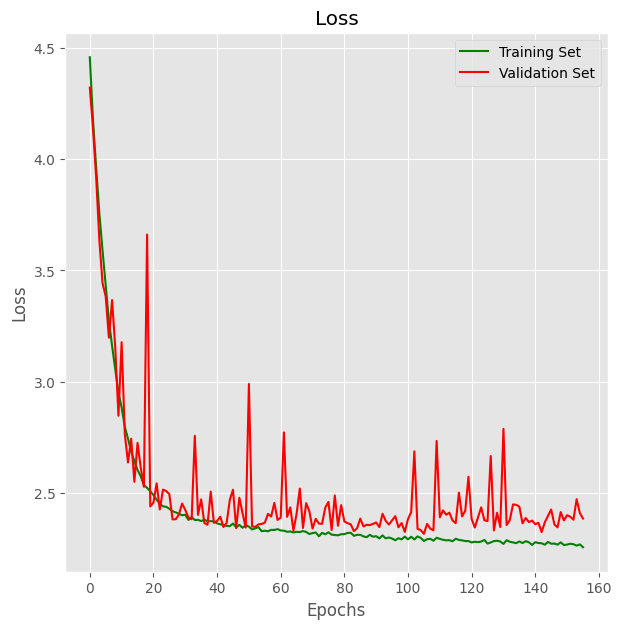

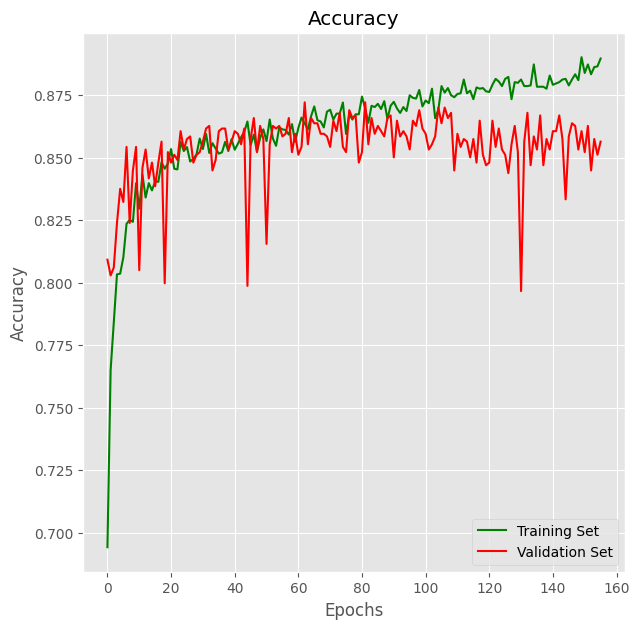

Average loss on train set: 2.419887050604209
Average accuracy on train set: 0.8627005116297648
Average loss on test set: 2.5083459371175523
Average accuracy on test set: 0.8538474967846503


2023-03-12 22:34:57.599882: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_22-25-37/fold-2: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_22-25-37/fold-2; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
2it [09:21, 284.04s/it]


-------- TERMINATED FOLD: 2 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-3/assets


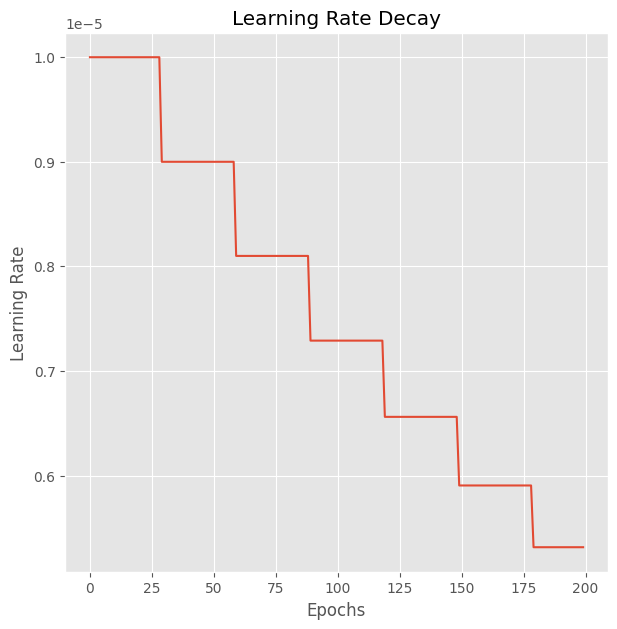

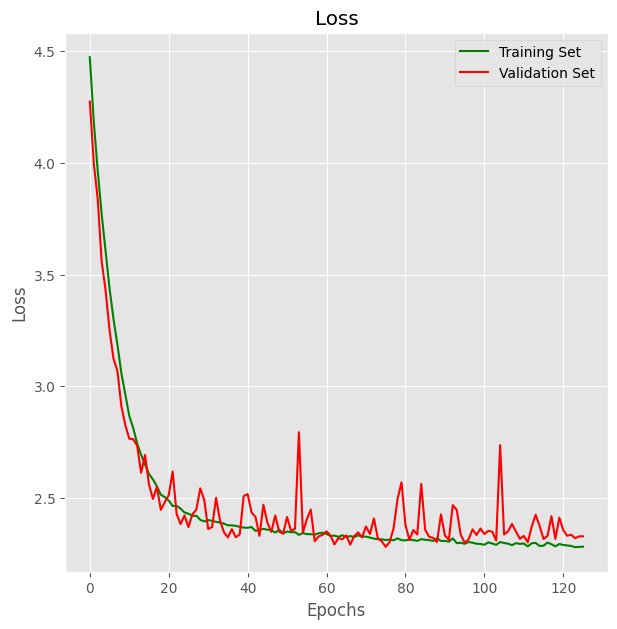

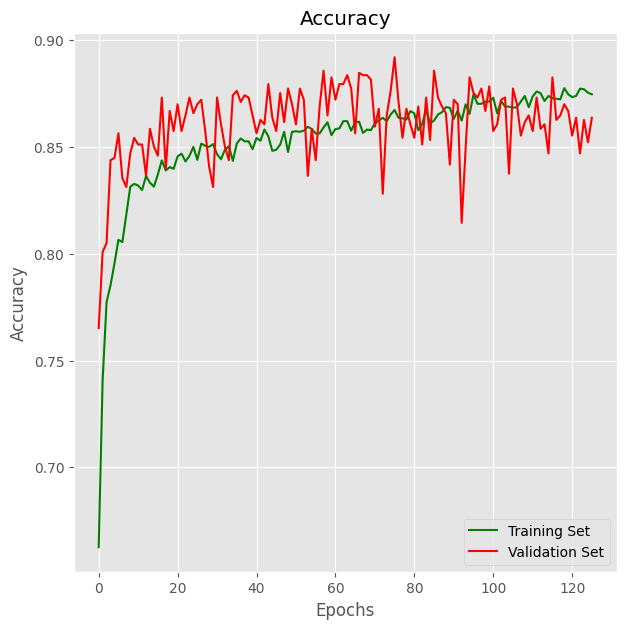

Average loss on train set: 2.4603452455429804
Average accuracy on train set: 0.8536032651151929
Average loss on test set: 2.4823808745732383
Average accuracy on test set: 0.8613690043252612


2023-03-12 22:39:24.794713: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_22-25-37/fold-3: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_22-25-37/fold-3; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
3it [13:48, 276.37s/it]


-------- TERMINATED FOLD: 3 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-4/assets


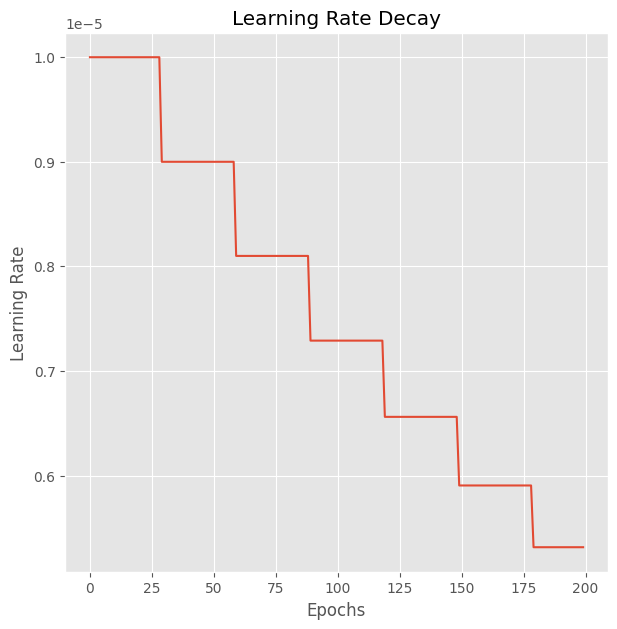

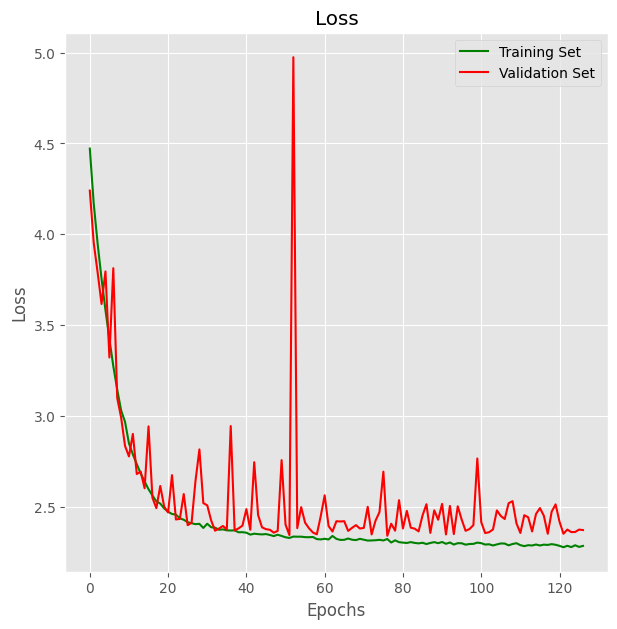

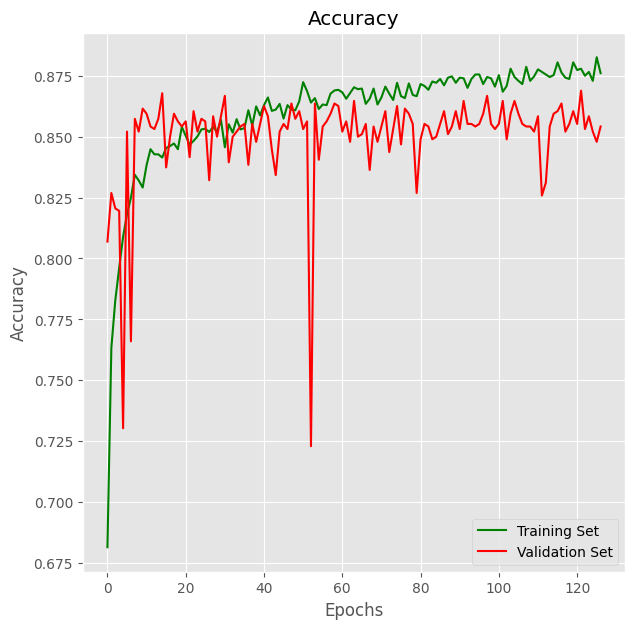

Average loss on train set: 2.4506589502800167
Average accuracy on train set: 0.859986997495486
Average loss on test set: 2.5676072300888424
Average accuracy on test set: 0.8502284579389677


2023-03-12 22:43:26.219539: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ../../../models/MLP/2023-03-12_22-25-37/fold-4: FAILED_PRECONDITION: ../../../models/MLP/2023-03-12_22-25-37/fold-4; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?
4it [17:50, 262.61s/it]


-------- TERMINATED FOLD: 4 --------


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-25-37/fold-5/assets
4it [18:22, 275.67s/it]


KeyboardInterrupt: 

In [3]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

model = tensorflow.point_net_model()

evaluation.k_fold_cross_validate(model=model, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.00001,
                                 epochs=200, batch_size=64, verbose=False)

In [4]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

model = tensorflow.point_net_model()

evaluation.k_fold_cross_validate(model=model, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.00001,
                                 epochs=400, batch_size=32, verbose=False)

Model save_path: ../../../models/MLP/2023-03-12_22-19-02
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_22-19-02/fold-1/assets
0it [01:35, ?it/s]


KeyboardInterrupt: 

In [3]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

layers = [
    tensorflow.input_layer((11,), dtype='float64'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(1024, activation='relu'),
    tensorflow.dense_layer(512, activation='relu'),
    tensorflow.dense_layer(256, activation='relu'),
    tensorflow.dense_layer(1, activation='sigmoid')
]

evaluation.k_fold_cross_validate(model=layers, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='MLP', learning_rate=0.0001,
                                 epochs=10, batch_size=32, verbose=False)

Model save_path: ../../../models/MLP/2023-03-12_20-31-11
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


0it [00:00, ?it/s]

Model: "MLP-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               3072      
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 256)               131328

INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_20-31-11/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_20-31-11/fold-1/assets


120/120 [==============================] - 2s 15ms/step - loss: 0.0515 - accuracy: 0.8267 - val_loss: 0.0448 - val_accuracy: 0.8574 - lr: 1.0000e-04
Epoch 2/10
116/120 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.8343
Epoch 2: val_loss improved from 0.04478 to 0.04120, saving model to ../../../models/MLP/2023-03-12_20-31-11/fold-1


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_20-31-11/fold-1/assets


INFO:tensorflow:Assets written to: ../../../models/MLP/2023-03-12_20-31-11/fold-1/assets


120/120 [==============================] - 2s 14ms/step - loss: 0.0450 - accuracy: 0.8351 - val_loss: 0.0412 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 3/10
107/120 [=========================>....] - ETA: 0s - loss: 0.0430 - accuracy: 0.8359

0it [00:05, ?it/s]


KeyboardInterrupt: 